# Investigated Data Set - TMDb Movie Data  



## Asking Questions Phase

I investigated the movie dataset. I would like to answer the questions below: 
1. In which years the Comedy genre has been produced?
2. Is budget and profit correlated?
3. Do longer movies need more budget?
4. Do high profit movies have high popularity?
5. Do the movies' popularity increase year by year?
6. How do the length of movies change overtime?










## Data Wrangling 
### Data Acquisition / Gathering   
Importing crucial library packages for data manupulation and wrangling.

In [101]:
# importing the required libraries for data cleaning, analysis, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

UsageError: Line magic function `%` not found.


### Data Assessing 
By means of pandas library I will assess the data. 

In [102]:
# reading the dataset 
movie_df = pd.read_csv('tmdb-movies.csv')

# viewing the first 5 entries 
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [103]:
# getting the number of the rows and columns 
movie_df.shape

(10866, 21)

In [104]:
# finding the statistical information (5 number summary, standard deviation, mean and count)
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [105]:
# getting the data types of the each variable
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [106]:
# viewing the data types and number of the null values 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [107]:
# getting the number of the unique values
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [108]:
# finding the number of the duplicated entries 
movie_df.duplicated().sum()

1

In [109]:
# finding number of the null values 
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Quality issues 

- Errorenous datatype in one variable (release_date)
- One duplicated record
- 0 record in several rows for revenue and budget variables 
- Missing values/null values (cast(10790), homepage(2936), director(10822), tagline(8042), keywords(9373), overview(10862), genres(10843), production_companies(9836))
 



#### Tidiness issues 

- Some variables are not needed for my investigation ('imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj')

### Data Cleaning  
After assessing data, I find several quality and tidiness issues to deal with in the cleaning phase. I will solve the problems with defining, coding and testing sequence. 

#### Tidiness issues - Some variables are not needed for my investigation 

#### Define 
Drop the unnecessary columns. 

#### Code 

In [110]:

# dropping the useless variables 
deleted_columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']
movie_df.drop(deleted_columns, axis = 1, inplace = True)

#### Test 

In [111]:
movie_df.shape

(10866, 14)

#### Quality issues - Errorenous datatype in one variable (release_date)

#### Define 
Convert the object data type to the datetime64 data type. 

#### Code 

In [112]:
# converting the data type of the release_date variable from string to datetime
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])


#### Test 

In [113]:
movie_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### Quality issues - One duplicated record

#### Define
Drop the duplicated record. 

#### Code 

In [114]:
# dropping the duplicated entries 
movie_df.drop_duplicates(inplace = True)

#### Test

In [115]:
# again viewing the number of rows and columns after dropping the duplicates
movie_df.shape

(10865, 14)

#### Quality issues - 0 record in several rows for revenue and budget variables 

#### Define 
Replace the 0 with null values and then drop the null values in revenue and budget variables 

#### Code 

In [116]:
# replacing the values with 0 with the null values and then drop the null value entries 
movie_df[['budget','revenue']] = movie_df[['budget','revenue']].replace(0, np.NAN)
movie_df.dropna(subset=['budget', 'revenue'], inplace=True)

#### Test 

In [117]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [118]:
movie_df.shape

(3854, 14)

In [22]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3808 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

#### Quality issues - Missing values/null values (cast(10790), homepage(2936), director(10822), tagline(8042), keywords(9373), overview(10862), genres(10843), production_companies(9836))

#### Define 
Reassess the data again and see that what records have been dealt with already. 

#### Code for assessing 

In [119]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3808 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

It seems that most of the variables have been dropped. Only cast(4), director(1), production_companies(46) have missed values. And they are a few in quantity and we can keep it as it is. 

Now after completing the wrangling phase, we can save the edited version of the data. After saving it is necessary to check the data again.

In [120]:
# saving the edited data set 
movie_df.to_csv('movie_edited.csv', index = False)

#read the edited data set 
movie_df = pd.read_csv('movie_edited.csv')

#viewing the new dataset 
movie_df.head()
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   float64
 3   revenue               3854 non-null   float64
 4   original_title        3854 non-null   object 
 5   cast                  3850 non-null   object 
 6   director              3853 non-null   object 
 7   runtime               3854 non-null   int64  
 8   genres                3854 non-null   object 
 9   production_companies  3808 non-null   object 
 10  release_date          3854 non-null   object 
 11  vote_count            3854 non-null   int64  
 12  vote_average          3854 non-null   float64
 13  release_year          3854 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 421.7+ KB


It seems everything is good, except the data type of the release_data. We need to convert it again. 

#### Define 
Convert object data type of release_date to datetime data type. 

#### Code 

In [121]:
# as after saving the edited file, it is needed again change the data type of the variable 'release_date'
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### Test 

In [122]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3808 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year      

## Data Exploration Phase 

In this phase, I will try to find answers to my question above. And after each visualization and summary I will share my observation respectively. 

#### Question 1: In which years the Comedy genre most has been produced? 

In [38]:
comedy = movie_df[movie_df['genres'] == 'Comedy']

<AxesSubplot:xlabel='release_year', ylabel='genres'>

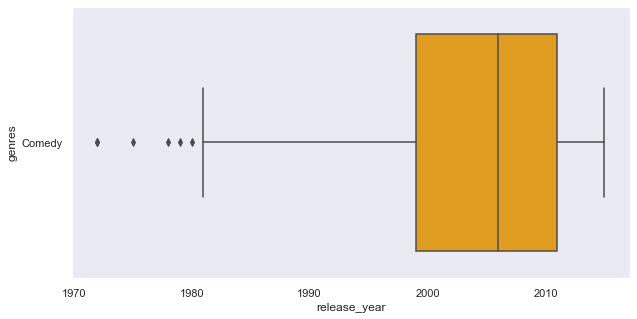

In [50]:
sns.boxplot(data = comedy, x = 'release_year', y = 'genres', color = 'orange')

#### Observation
By means of boxplot, I can get more information, such as min, max, mean, Q1 and Q2 (5Q). It seems that after the 2010 the comedy genre has been produced more. 

#### Question 2: Is budget and profit correlated? 

/Users/lamanmammadli/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


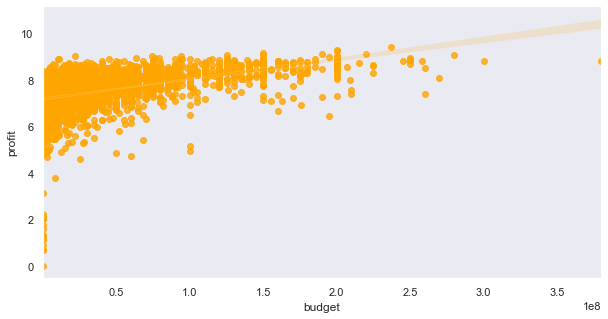

In [60]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(movie_df['budget'], movie_df['profit'].apply(log_trans), color = 'orange');

#### Observation

From the plot it seems that there is a positive correlation between the budget and profit. As the budget increase, the profit also increases. 

#### Question 3: Do longer movies need more budget?

<AxesSubplot:xlabel='runtime', ylabel='budget'>

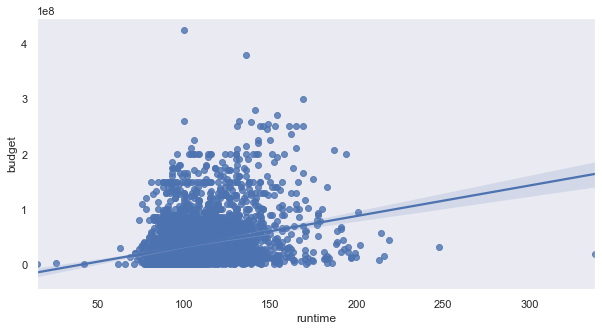

In [63]:
sns.regplot(data = movie_df, x = 'runtime', y = 'budget')

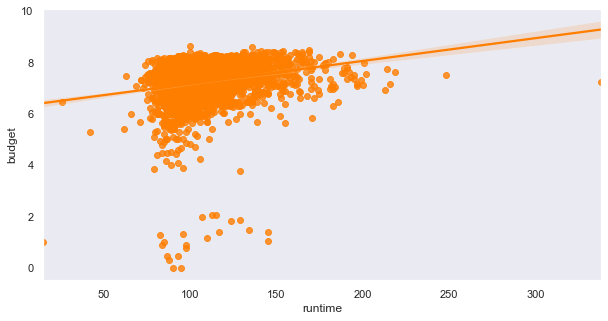

In [73]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sns.regplot(movie_df['runtime'], movie_df['budget'].apply(log_trans), color = '#FF7E00');

#### Observation

The plot displays that there is positive relationship between the runtime of the movie and the budget spend on movie. 

#### Question 4: Do high profit movies have high popularity? 

<AxesSubplot:xlabel='popularity', ylabel='profit'>

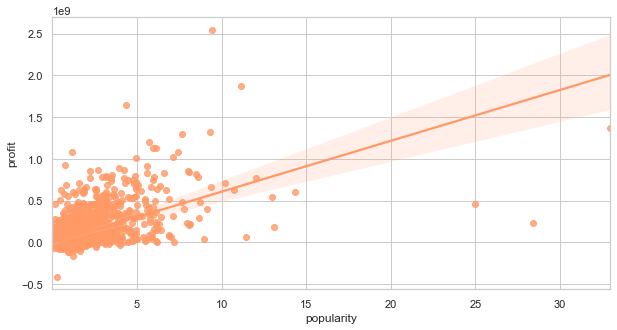

In [123]:
# adding a new variable, named 'Profit'
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

sns.regplot(data = movie_df, x = 'popularity', y = 'profit', color = '#FF9966')

#### Observation 

The plot shows that there is positive correlation between the popularity and profit of the movie. 

We can observe overall results of the questions 8-10 by running the multivariate analysis. 

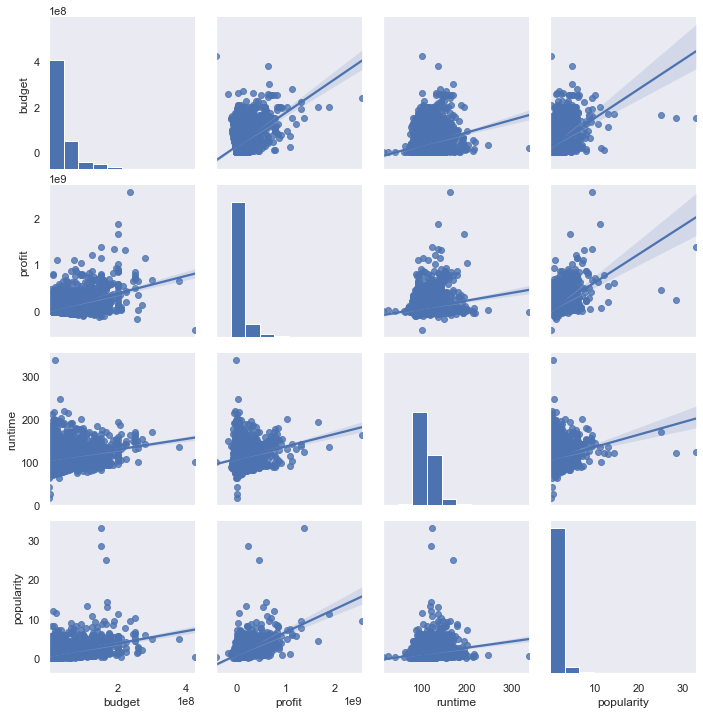

In [86]:
variables = ['budget', 'profit', 'runtime', 'popularity']
g = sns.PairGrid(data = movie_df, vars = variables)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)

#### Question 5: Do the movies' popularity increase year by year? 

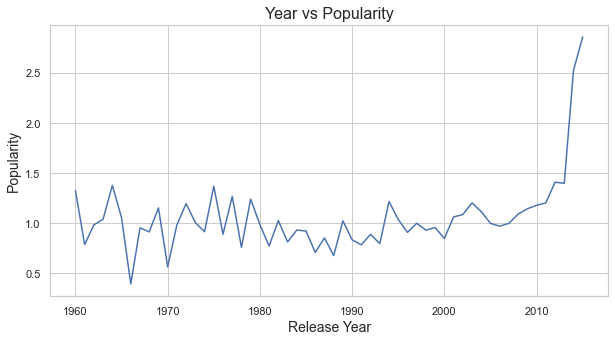

In [90]:
movie_df.groupby('release_year')['popularity'].mean().plot()

# setup the title and labels of the figure.
plt.title("Year vs Popularity",fontsize = 16)
plt.xlabel('Release Year',fontsize = 14)
plt.ylabel('Popularity',fontsize = 14)

# setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

#### Observation

The plot shows that the after 2010 the popularity of movies go up, while in previous years it was fluctating. 

#### Question 6: How do the length of movies change overtime? 

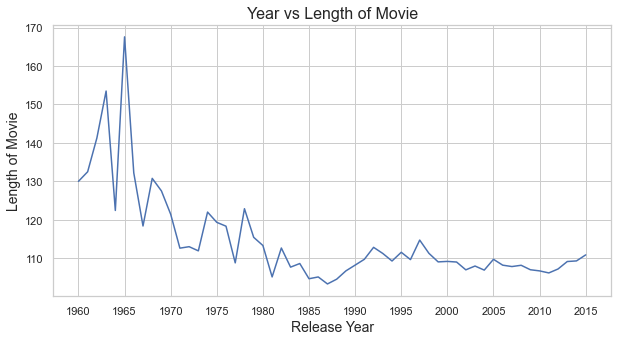

In [124]:
movie_df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

# setup the title and labels of the figure.
plt.title("Year vs Length of Movie",fontsize = 16)
plt.xlabel('Release Year',fontsize = 14)
plt.ylabel('Length of Movie',fontsize = 14)

# setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

#### Observation

I see that the highest movie run time observed in 1965, and after that it was fluctating. 

### Notes 

While investigating the data, I used my knowledge learned in this course, searched libraries documentation, stackoverflow and github in a few cases. 